In [64]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv(
    r"D:\Projects\GitHub\Python-Michael\Data\Dataset\sp500.csv",
    index_col="Symbol",
    usecols=[0, 2, 3, 7],
)
df.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [46]:
df.describe()

,Price,Book Value
count,500.00000,499.000000
mean,77.36860,301.611301
std,87.59694,6195.727862
min,0.00000,-51.275000
25%,38.74500,10.836500
50%,58.35500,19.098000
75%,86.68000,31.386500
max,1197.12000,138425.453100


In [47]:
df.loc[["ABT", "ZTS"]][["Sector", "Price"]]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Book Value'}>]], dtype=object)

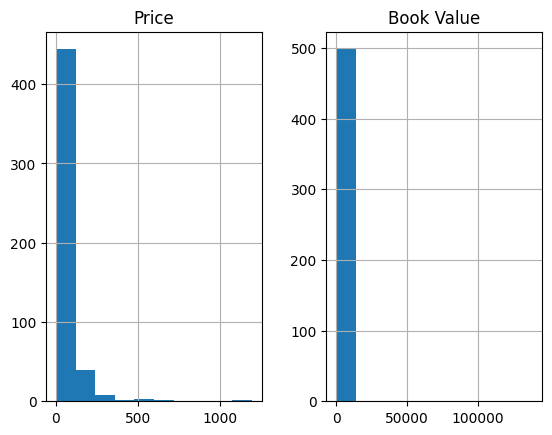

In [49]:
df.hist()

<Axes: xlabel='Symbol'>

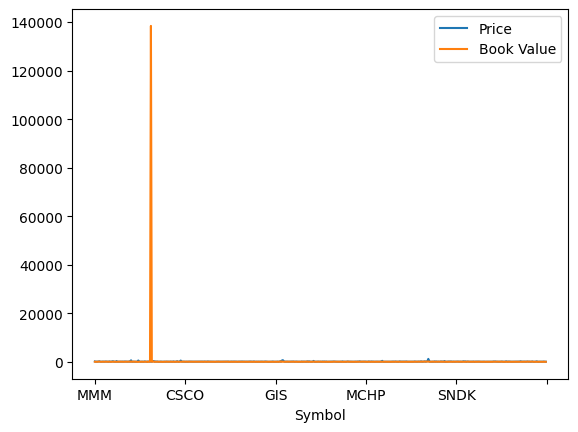

In [51]:
df.plot()

In [52]:
df_copy = df.copy()
df_copy.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [54]:
df_copy = df_copy.rename(columns={"Book Value": "BookValue"})
df_copy.head()

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [55]:
df_copy["Rounded_price"] = df_copy["Price"].round()
# Вставляем столбец в качестве второгго столбца датафрейма

In [59]:
df_copy2 = df.copy()
df_copy2.insert(1, "Rounded_price", df_copy.Price.round())
df_copy2
# Вставляем столбец в качестве второгго столбца датафрейма

,Sector,Rounded_price,Price,Book Value
Symbol,,,,
MMM,Industrials,141.0,141.14,26.668
ABT,Health Care,40.0,39.60,15.573
ABBV,Health Care,54.0,53.95,2.954
ACN,Information Technology,80.0,79.79,8.326
ACE,Financials,103.0,102.91,86.897
...,...,...,...,...
YHOO,Information Technology,35.0,35.02,12.768
YUM,Consumer Discretionary,75.0,74.77,5.147
ZMH,Health Care,102.0,101.84,37.181


In [68]:
df_copy3 = df[:3].copy()
df_copy3.loc[:, "Per"] = pd.Series(np.random.normal(size=500),
                                   index=df_copy3.index)
df_copy3.head()

ValueError: Length of values (500) does not match length of index (3)

In [70]:
conc = pd.concat([df, df_copy], axis=1)
conc

,Sector,Price,Book Value,Sector,Price,BookValue,Rounded_price
Symbol,,,,,,,
MMM,Industrials,141.14,26.668,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,Health Care,53.95,2.954,54.0
ACN,Information Technology,79.79,8.326,Information Technology,79.79,8.326,80.0
ACE,Financials,102.91,86.897,Financials,102.91,86.897,103.0
...,...,...,...,...,...,...,...
YHOO,Information Technology,35.02,12.768,Information Technology,35.02,12.768,35.0
YUM,Consumer Discretionary,74.77,5.147,Consumer Discretionary,74.77,5.147,75.0
ZMH,Health Care,101.84,37.181,Health Care,101.84,37.181,102.0


In [72]:
reversed_colums = df_copy.columns[::-1]
reversed_colums

Index(['Rounded_price', 'BookValue', 'Price', 'Sector'], dtype='object')

In [74]:
df_copy[reversed_colums][:5]

,Rounded_price,BookValue,Price,Sector
Symbol,,,,
MMM,141.0,26.668,141.14,Industrials
ABT,40.0,15.573,39.60,Health Care
ABBV,54.0,2.954,53.95,Health Care
ACN,80.0,8.326,79.79,Information Technology
ACE,103.0,86.897,102.91,Financials


In [77]:
df_copy.Price = conc.Rounded_price
df_copy
# Замена столбца прайс на раунд прайс

,Sector,Price,BookValue,Rounded_price
Symbol,,,,
MMM,Industrials,141.0,26.668,141.0
ABT,Health Care,40.0,15.573,40.0
ABBV,Health Care,54.0,2.954,54.0
ACN,Information Technology,80.0,8.326,80.0
ACE,Financials,103.0,86.897,103.0
...,...,...,...,...
YHOO,Information Technology,35.0,12.768,35.0
YUM,Consumer Discretionary,75.0,5.147,75.0
ZMH,Health Care,102.0,37.181,102.0


In [80]:
del df_copy["Price"]
# del df_copy['Price'] удалили, поэтому не можем 2 раза дел делать
df_copy

,Sector,BookValue,Rounded_price
Symbol,,,
MMM,Industrials,26.668,141.0
ABT,Health Care,15.573,40.0
ABBV,Health Care,2.954,54.0
ACN,Information Technology,8.326,80.0
ACE,Financials,86.897,103.0
...,...,...,...
YHOO,Information Technology,12.768,35.0
YUM,Consumer Discretionary,5.147,75.0
ZMH,Health Care,37.181,102.0


In [81]:
df_copy.pop("Sector")
df_copy

,BookValue,Rounded_price
Symbol,,
MMM,26.668,141.0
ABT,15.573,40.0
ABBV,2.954,54.0
ACN,8.326,80.0
ACE,86.897,103.0
...,...,...
YHOO,12.768,35.0
YUM,5.147,75.0
ZMH,37.181,102.0
